# Objective
Prediction of test score based on the performance like test prepration, education, gender, ethnicity.

# Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#for ignore the warnings
import warnings
warnings.filterwarnings("ignore")

# Load the Data set
* Data is collected fromt eh kaggle 

In [ ]:
df = pd.read_csv("data/stud.csv")
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [3]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
# statistical information
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
# Check for missing values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
# check for duplicates
df.duplicated().sum()

0

No duplicates values are present

# List of Numerical and Categorical Columns

In [45]:
# cget categorical and numerical columns

cat_col =[]
num_col= []

for i in df.columns:
    if df[i].dtype == 'object':
        cat_col.append(i)
    else:
        num_col.append(i)

print("Categorical Columns: ", len(cat_col), cat_col)
print("Numerical Columns: ",len(num_col), num_col)

Categorical Columns:  5 ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
Numerical Columns:  3 ['math_score', 'reading_score', 'writing_score']


# Count values | Number of unique variable of categorical 

In [ ]:
# fucntion to get all categorical column's value counts
def count_values(data,column_name):
    for i in column_name:
        count = data[i].value_counts()
        uni = data[i].nunique()
        print(f"{uni} :-  {count}")
        print()

    

count_values(df, cat_col)


2 :-  gender
female    518
male      482
Name: count, dtype: int64

5 :-  race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

6 :-  parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

2 :-  lunch
standard        645
free/reduced    355
Name: count, dtype: int64

2 :-  test_preparation_course
none         642
completed    358
Name: count, dtype: int64



# Feature Engineering 

In [49]:

df['total_score'] = df['reading_score'] + df['math_score'] + df['reading_score']

df['average_score'] = round(df['total_score'] /3,2)
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,216,72.0
1,female,group C,some college,standard,completed,69,90,88,249,83.0


### Number of Students who got the full marks in courses

In [76]:
count_reading = df[df['reading_score'] == 100].shape[0]
count_math = df[df['math_score'] == 100].shape[0]
count_writing = df[df['writing_score'] == 100].shape[0]
# Print the results
print(f"Count of students with reading_score 100: {count_reading}")
print(f"Count of students with math_score 100: {count_math}")
print(f"Count of students with writing_score 100: {count_writing}")

Count of students with reading_score 100: 17
Count of students with math_score 100: 7
Count of students with writing_score 100: 14


# Data Visualization

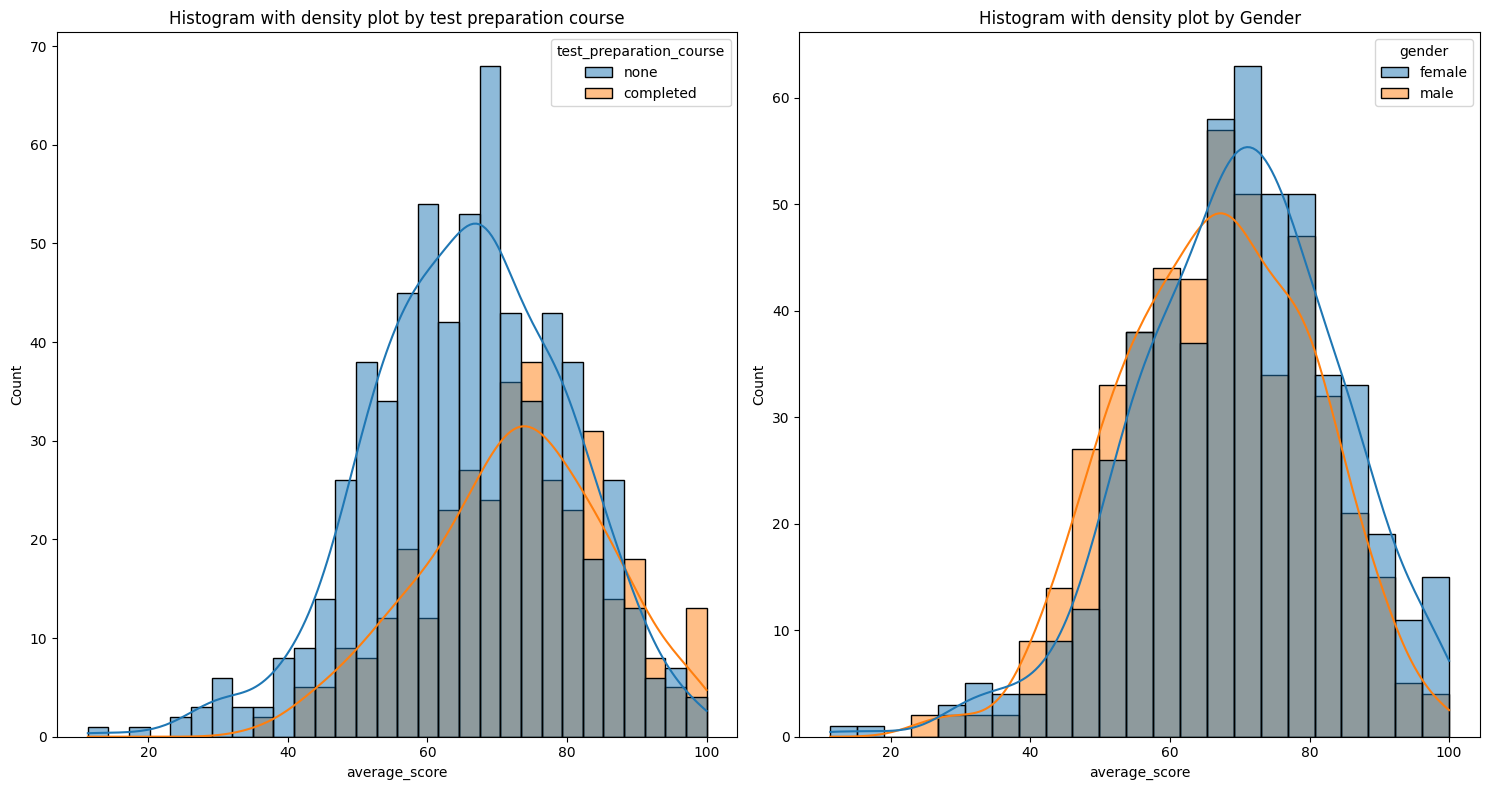

In [110]:
fig, axs = plt.subplots(1,2, figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(data = df , x='average_score',bins= 30, kde=True, hue ='test_preparation_course', ax= axs[0])
axs[0].set_title("Histogram with density plot by test preparation course")

sns.histplot(data=df, x='average_score', kde= True,hue= df['gender'], ax= axs[1])
axs[1].set_title("Histogram with density plot by Gender")

plt.tight_layout()

plt.show()

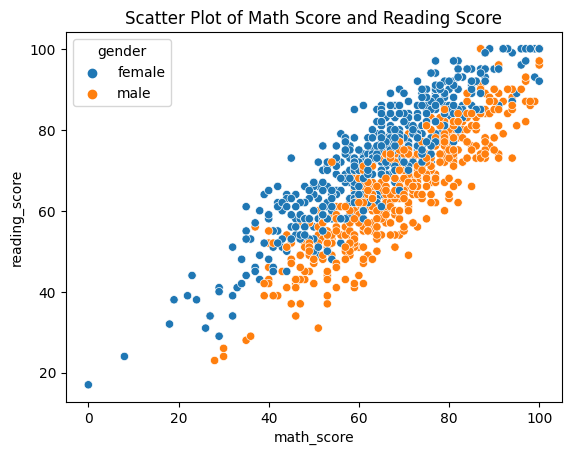

In [136]:
sns.scatterplot(data=df, x='math_score', y='reading_score',hue='gender')
plt.title("Scatter Plot of Math Score and Reading Score")
plt.show()

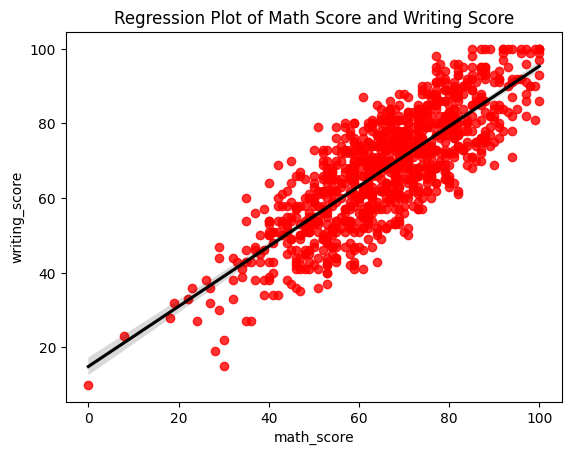

In [139]:
sns.regplot(data=df, x='math_score', y='writing_score',scatter_kws={'color':'red'}, color= 'black')
plt.title("Regression Plot of Math Score and Writing Score")
plt.show()

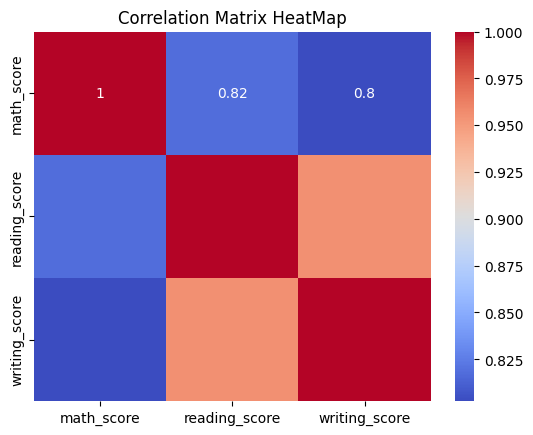

In [134]:
corr = df[num_col].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix HeatMap")
plt.show()

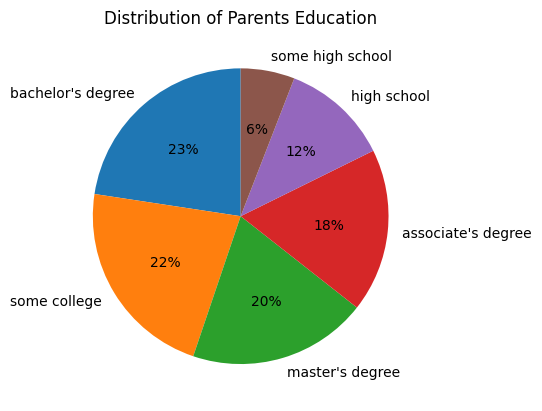

In [163]:
label = df['parental_level_of_education'].unique()
count = df['parental_level_of_education'].value_counts()

plt.pie(count,labels=label, autopct='%1.f%%', startangle=90)
plt.title("Distribution of Parents Education")
plt.show()